#**PROBLEMA DE NEGOCIO**


---




##Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

# 1. Configuración del ambiente

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import sklearn as sn
import requests


# 2. Obtención, Tratamiento y Análisis Exploratorio (EDA)

### Cargando las bases de datos

In [ ]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]


*   **df_covid**: contiene información de la evolución de casos del covid19. Base de datos otorgada por W.H.O. (World Health Organization).
*   **df_population**: contiene información demográfica proporcionada por P.U.N. (Population United Nations)





### 2.1. EDA Base Covid World Health Organization

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [ ]:
#from ast import Index
df_covid_limpio = df_covid.dropna(subset = ['Country_code'])
df_covid_limpio = df_covid_limpio[['Date_reported','Country_code','Country',
 'New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']]
df_covid_limpio.fillna(0,inplace = True)

In [ ]:
df_covid_limpio.isna().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [ ]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [ ]:
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])

In [ ]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  float64       
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  float64       
 6   Cumulative_deaths  49396 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.0+ MB


In [ ]:
df_covid_limpio[['New_cases','New_deaths']] = df_covid_limpio[['New_cases','New_deaths']].astype('int64')

In [ ]:
df_covid_limpio['lethality_rate'] = ((df_covid_limpio['Cumulative_deaths'])/(df_covid_limpio['Cumulative_cases'])) * 100

In [ ]:
df_covid_limpio['lethality_rate'].fillna(0, inplace=True)

<Axes: >

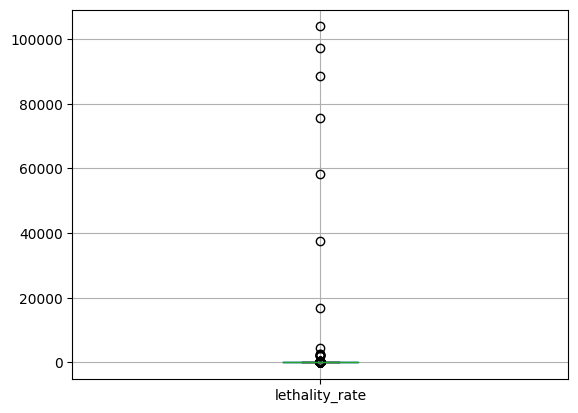

In [ ]:
df_covid_limpio.boxplot(column=['lethality_rate'])

In [ ]:
centiles = df_covid_limpio.lethality_rate.quantile([i/100 for i in range(1,100)])
centiles

0.01     0.000000
0.02     0.000000
0.03     0.000000
0.04     0.000000
0.05     0.000000
          ...    
0.95     5.000000
0.96     5.650517
0.97     6.460209
0.98     7.928402
0.99    12.260898
Name: lethality_rate, Length: 99, dtype: float64

In [ ]:
df_covid_limpio.shape

(49396, 8)

In [ ]:
df_covid_limpio = df_covid_limpio[df_covid_limpio['lethality_rate'] <= centiles[0.99]]

<Axes: >

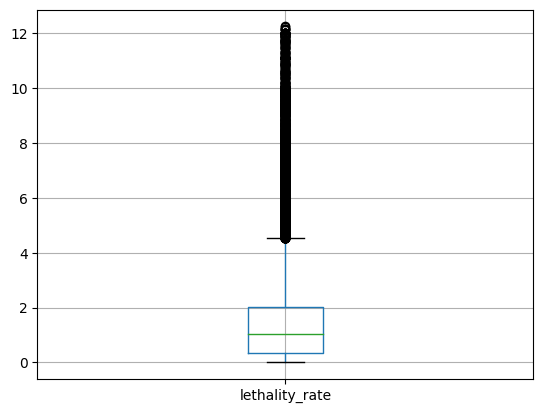

In [ ]:
df_covid_limpio.boxplot(column=['lethality_rate'])

In [ ]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,4.890200e+04,4.890200e+04,48902.000000,4.890200e+04,48902.000000
mean,1.578961e+04,1.659527e+06,138.018609,1.938730e+04,1.452976
std,2.420378e+05,7.309166e+06,867.312807,7.947323e+04,1.625929
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000
25%,0.000000e+00,3.904000e+03,0.000000,2.900000e+01,0.326607
50%,1.030000e+02,4.379300e+04,0.000000,4.710000e+02,1.029184
75%,2.005750e+03,5.070115e+05,20.000000,6.637750e+03,2.004507
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06,12.260536


### 2.2. EDA Base Population United Nations (información demográfica)

#### 1.1. Creamos una copia de df_population y nos quedamos con aquellas columnas de interés.


In [ ]:
df_population_limpio = df_population[['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']].copy()
df_population_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   ISO2 Alpha-code                                           236 non-null    object
 1   Total Population, as of 1 July (thousands)                286 non-null    object
 2   Male Population, as of 1 July (thousands)                 286 non-null    object
 3   Female Population, as of 1 July (thousands)               286 non-null    object
 4   Population Density, as of 1 July (persons per square km)  286 non-null    object
 5   Life Expectancy at Birth, both sexes (years)              286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


#### 1.2. Renombramos las columnas para mejor compresión de su información

In [ ]:
df_population_limpio = df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
})
df_population_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


#### 1.3. Eliminamos registros nulos

In [ ]:
#Verificar registros nulos (antes de eliminarlos)
df_population_limpio.isna().sum()

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

In [ ]:
#Eliminar todos los registros nulos
df_population_limpio.dropna(inplace=True)
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

#### 1.4. Formateamos las estructuras de datos

In [ ]:
#Requerimos convertir las columnas 1 a la 5 en INT
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    236 non-null    object
 2   Male_Population     236 non-null    object
 3   Female_Population   236 non-null    object
 4   Population_Density  236 non-null    object
 5   Life_Expectancy     236 non-null    object
dtypes: object(6)
memory usage: 12.9+ KB


In [ ]:
#Observamos que tenemos decimales, por lo que deberíamos redondearlos previamente para su conversión
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874.838,5894.278,5980.56,457.605,62.351
1873,KM,790.986,397.126,393.86,425.033,64.068
1945,DJ,1073.994,533.626,540.367,46.333,63.085
2017,ER,3498.818,1724.86,1773.958,28.881,67.3
2089,ET,114120.594,57375.433,56745.161,114.121,65.838


In [ ]:
#Primero la convertimos a float (las columnas comentadas dan un error)
df_population_limpio = df_population_limpio.astype({
  'Total_Population': 'float',
  # 'Male_Population': 'float',
  # 'Female_Population': 'float',
  'Population_Density': 'float',
  # 'Life_Expectancy': 'float'
})
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        236 non-null    object 
 1   Total_Population    236 non-null    float64
 2   Male_Population     236 non-null    object 
 3   Female_Population   236 non-null    object 
 4   Population_Density  236 non-null    float64
 5   Life_Expectancy     236 non-null    object 
dtypes: float64(2), object(4)
memory usage: 12.9+ KB


In [ ]:
#Detectamos que existen errores tipográficos que no pueden ser convertidos directamente en floats
criterio = df_population_limpio['Male_Population'] == '...'
df_population_limpio[criterio]

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
12817,VA,0.528,...,...,1200.0,...


In [ ]:
#Aplicamos una conversión utilizando el método de pandas to_numeric() que nos provee manejo de éste tipo de errores
#El parámetro errors, indica qué hacer en caso de encontrar un valor no numérico. El valor coerce, reemplazará los strings no identificados como números por NaN

df_population_limpio['Male_Population'] = pd.to_numeric(df_population_limpio['Male_Population'], errors='coerce')
df_population_limpio['Female_Population'] = pd.to_numeric(df_population_limpio['Female_Population'], errors='coerce')
df_population_limpio['Life_Expectancy'] = pd.to_numeric(df_population_limpio['Life_Expectancy'], errors='coerce')

df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        236 non-null    object 
 1   Total_Population    236 non-null    float64
 2   Male_Population     235 non-null    float64
 3   Female_Population   235 non-null    float64
 4   Population_Density  236 non-null    float64
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.9+ KB


In [ ]:
#Verificamos cuántos NaN tenemos resultado del tratamiento
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       1
Female_Population     1
Population_Density    0
Life_Expectancy       1
dtype: int64

In [ ]:
#Eliminamos los NaN
df_population_limpio.dropna(inplace=True)
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [ ]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        235 non-null    object 
 1   Total_Population    235 non-null    float64
 2   Male_Population     235 non-null    float64
 3   Female_Population   235 non-null    float64
 4   Population_Density  235 non-null    float64
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.9+ KB


In [ ]:
#Redondeamos los valores para arriba y convertimos en enteros
df_population_limpio['Total_Population'] = df_population_limpio['Total_Population'].round(0).astype('int64')
df_population_limpio['Male_Population'] = df_population_limpio['Male_Population'].round(0).astype('int64')
df_population_limpio['Female_Population'] = df_population_limpio['Female_Population'].round(0).astype('int64')
df_population_limpio['Population_Density'] = df_population_limpio['Population_Density'].round(0).astype('int64')
df_population_limpio['Life_Expectancy'] = df_population_limpio['Life_Expectancy'].round(0).astype('int64')

df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        235 non-null    object
 1   Total_Population    235 non-null    int64 
 2   Male_Population     235 non-null    int64 
 3   Female_Population   235 non-null    int64 
 4   Population_Density  235 non-null    int64 
 5   Life_Expectancy     235 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.9+ KB


In [ ]:
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11875,5894,5981,458,62
1873,KM,791,397,394,425,64
1945,DJ,1074,534,540,46,63
2017,ER,3499,1725,1774,29,67
2089,ET,114121,57375,56745,114,66


#### 1.5. Multiplicamos por 1000 las columnas 'Total_Population', 'Male_Population' y 'Female_Population'

In [ ]:
df_population_limpio[['Total_Population','Male_Population','Female_Population']] = df_population_limpio[['Total_Population','Male_Population','Female_Population']]*1000
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11875000,5894000,5981000,458,62
1873,KM,791000,397000,394000,425,64
1945,DJ,1074000,534000,540000,46,63
2017,ER,3499000,1725000,1774000,29,67
2089,ET,114121000,57375000,56745000,114,66


#### 1.6. Eliminar todos los registros nulos

In [ ]:
#No contamos con registros nulos porque ya los tratamos ni bien los identficamos
df_population_limpio.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

#### 1.7. Reiniciamos los índices

In [ ]:
df_population_limpio.reset_index(inplace=True, drop=True)
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11875000,5894000,5981000,458,62
1,KM,791000,397000,394000,425,64
2,DJ,1074000,534000,540000,46,63
3,ER,3499000,1725000,1774000,29,67
4,ET,114121000,57375000,56745000,114,66


# 3. Pregunta1

Acá analizaremos cómo evolucionó el covid en Argentina y en Colombia en comparación a la evolución a nivel global.

#### Worldwide Cases Distribution

In [ ]:
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [ ]:
total_por_pais = df_covid_limpio.groupby('Country')
total_por_pais = total_por_pais['Cumulative_cases'].max().sort_values(ascending = False)

In [ ]:
top_10_paises = total_por_pais.nlargest(10)
top_10_paises

Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Name: Cumulative_cases, dtype: int64

In [ ]:
otros = total_por_pais.drop(top_10_paises.index).sum() #esto sería el total de casos acumulados mundialmente
top_10_paises['Otros'] = otros
top_10_paises


Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Otros                                                   291519855
Name: Cumulative_cases, dtype: int64

In [ ]:
# Se crea la variable ARG
ARG =  df_covid_limpio['Country'] == 'Argentina'
ARG = df_covid_limpio[ARG]
ARG = ARG.groupby('Country')
ARG = ARG['Cumulative_cases'].max()
ARG


Country
Argentina    10081076
Name: Cumulative_cases, dtype: int64

In [ ]:
#Se crea la variable COL
COL =  df_covid_limpio['Country'] == 'Colombia'
COL = df_covid_limpio[COL]
COL = COL.groupby('Country')
COL = COL['Cumulative_cases'].max()
COL

Country
Colombia    6391672
Name: Cumulative_cases, dtype: int64

#### Creación de la Variable top_10_paises_col_arg que almacena la información de Colombia y Argentina

In [ ]:
top_10_paises_col_arg = top_10_paises.copy()
#Se agrega la Fila 'Argentina'
top_10_paises_col_arg['Argentina'] = np.sum(ARG)
#Se agrega la Fila 'Colombia'
top_10_paises_col_arg['Colombia'] = np.sum(COL)
#Se elimina la fila 'Otros' para su remplazo
top_10_paises_col_arg = top_10_paises_col_arg.drop('Otros')
#Se le resta la información de la fila 'Otros' del DataFrame 'top_10_paises' con el total de 'Cumulative_cases' en Colombia y Argentina
otros = top_10_paises['Otros'] - top_10_paises_col_arg['Colombia'] - top_10_paises_col_arg['Argentina']
# Se actualiza la fila 'Otros' con la información
top_10_paises_col_arg['Otros'] = otros
top_10_paises_col_arg

Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Argentina                                                10081076
Colombia                                                  6391672
Otros                                                   275047107
Name: Cumulative_cases, dtype: int64

In [ ]:
col_arg_cases = top_10_paises_col_arg.copy()

not_col_arg = []
for country, cases in top_10_paises_col_arg.items():
  if (country not in['Argentina', 'Colombia']):
    not_col_arg.append(country)

col_arg_cases = col_arg_cases.drop(not_col_arg)
col_arg_cases

Country
Argentina    10081076
Colombia      6391672
Name: Cumulative_cases, dtype: int64

#### Case Progression by Country

In [ ]:
total_por_país = df_covid_limpio.groupby('Country')
total_por_país
total_por_país=total_por_país['Cumulative_cases'].max().sort_values(ascending = False)

In [ ]:
top_5_paises = total_por_país.head(5)
top_5_paises

Country
United States of America    103436829
China                        99326423
India                        45023751
France                       38997490
Germany                      38437756
Name: Cumulative_cases, dtype: int64

In [ ]:
df_covid_limpio_reset = df_covid_limpio.reset_index(drop=True)
df_covid_limpio_reset.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [ ]:
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]
df_top_5.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
8851,2020-01-05,CN,China,1,1,0,0,0.000000
8852,2020-01-12,CN,China,44,45,1,1,2.222222
8853,2020-01-19,CN,China,80,125,2,3,2.400000
8854,2020-01-26,CN,China,1860,1985,53,56,2.821159
8855,2020-02-02,CN,China,12426,14411,305,361,2.505031


In [ ]:
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
China,1.0,45.0,125.0,1985.0,14411.0,37251.0,68584.0,77042.0,79968.0,80859.0,...,99320035.0,99320425.0,99320845.0,99321242.0,99321637.0,99322142.0,99322727.0,99323756.0,99325108.0,99326423.0
France,0.0,0.0,0.0,3.0,6.0,12.0,12.0,16.0,16.0,16.0,...,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,1075.0,...,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0
India,0.0,0.0,0.0,0.0,2.0,7.0,7.0,7.0,7.0,39.0,...,45001575.0,45001764.0,45002179.0,45003055.0,45004816.0,45008620.0,45013172.0,45018134.0,45021758.0,45023751.0
United States of America,0.0,0.0,0.0,7.0,9.0,20.0,24.0,40.0,73.0,464.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0


#### Visualización

In [ ]:
col_arg_cases

Country
Argentina    10081076
Colombia      6391672
Name: Cumulative_cases, dtype: int64

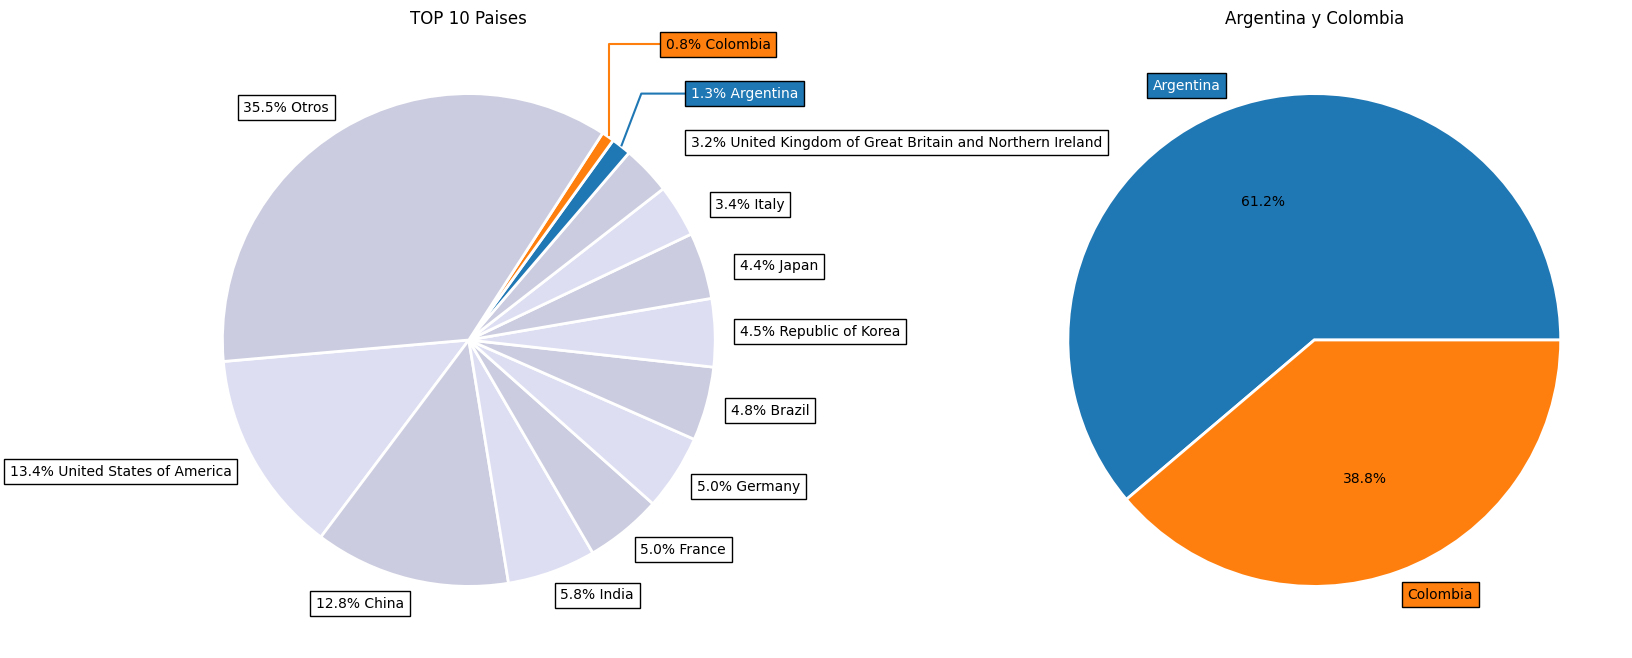

In [ ]:
# Gráfico de Donuts
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

#wedges son las líneas de los contornos del gráfico
#texts almacena los labels "Argentina" "Colombia"
#autotexts almacena los % dentro del pie

#Plot 1
axs[0].set_title('TOP 10 Paises')
wedges, texts, autotexts = axs[0].pie(
  top_10_paises_col_arg,
  labels=top_10_paises_col_arg.index,
  autopct='%1.1f%%',
  # pctdistance=1.2
  startangle=185,
  wedgeprops={
  "edgecolor": "white",
  "linewidth": 2,
  },
  colors=['#dddef2','#cbccdf', '#dddef2', '#cbccdf', '#dddef2', '#cbccdf', '#dddef2', '#cbccdf', '#dddef2','#cbccdf', '#1F77B4','#FF7F0E', '#cbccdf']
)

labels = []

for index, country in enumerate(texts):
  country.set_bbox(dict(facecolor='white', alpha=1))
  labels.append(f'{autotexts[index].get_text()} {country.get_text()}')

for index, text in enumerate(texts):
  text.set_text(labels[index])

usa, china, india, france, germany, brazil, korea, japan, italy, uk, argentina, colombia, otros = [country for country in texts]


#Ajustamos la posición de colombia porque pisa a Argentina
colombia.set_position((0.8, 1.2))
colombia.set_bbox(dict(facecolor='#FF7F0E', alpha=1))
axs[0].plot([0.57, 0.57, 0.8],[0.83, 1.2, 1.2], color="#FF7F0E", linewidth=1.5)


#Ajustamos la posición de Argentina porque pisa a UK
argentina.set_position((0.9, 1))
argentina.set_bbox(dict(facecolor='#1F77B4', alpha=1))
argentina.set_color('white')
axs[0].plot([0.62, 0.7, 1],[0.79, 1, 1], color="#1F77B4", linewidth=1.5)

#Ajustamos la posición de UK
uk.set_position((0.9, 0.8))

# #Ajustamos la posición de Italy
italy.set_position((1, 0.55))

# #Ajustamos la posicion de japan
japan.set_position((1.1, 0.3))

#Ocultamos los % del pieplot
for pct in autotexts:
  pct.set_text('')


#Plot 2
axs[1].set_title('Argentina y Colombia')
wedges, texts, autotexts = axs[1].pie(
  col_arg_cases,
  labels=col_arg_cases.index,
  autopct='%1.1f%%',
  wedgeprops={
    "edgecolor": "white",
    "linewidth": 2,
  }
)

argentina = texts[0]
argentina.set_bbox(dict(facecolor='#1F77B4', alpha=1))
argentina.set_color('white')

colombia = texts[1]
colombia.set_bbox(dict(facecolor='#FF7F0E', alpha=1))


plt.show()

In [ ]:
top_10_paises_col_arg

Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Argentina                                                10081076
Colombia                                                  6391672
Otros                                                   275047107
Name: Cumulative_cases, dtype: int64

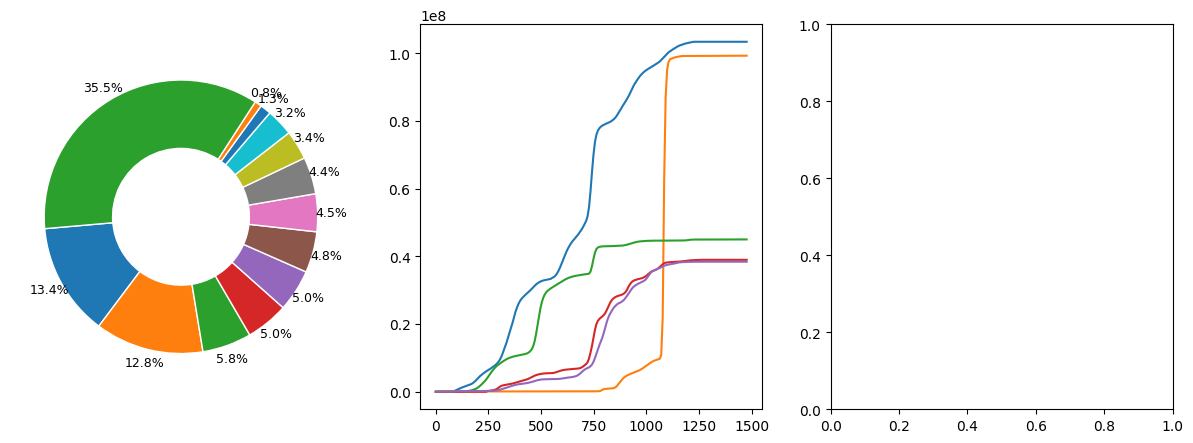

In [ ]:
# Gráfico de Donuts
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
wedges, texts, autotexts = axs[0].pie(top_10_paises_col_arg, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=1.1, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))

# Gráfico de Líneas
for pais in top_5_paises.index:
    days_since_start = (total_acumulado_top_5.columns - total_acumulado_top_5.columns[0]).days
    axs[1].plot(days_since_start, total_acumulado_top_5.loc[pais], label=pais)

# Pregunta 2

#### Casos Colombia

In [ ]:
#Daily New Cases Colombia
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.set_index('Country')
grouped_df = grouped_df.loc[['Colombia']]
fechas = grouped_df.columns
new_cases_col = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
new_cases_col = new_cases_col[new_cases_col > 0]
new_cases_col

Date_reported
2020-03-08       1.0
2020-03-15      15.0
2020-03-22     180.0
2020-03-29     527.0
2020-04-05     544.0
               ...  
2023-12-24     560.0
2023-12-31     692.0
2024-01-07     978.0
2024-01-14    2156.0
2024-01-21    2307.0
Length: 201, dtype: float64

Text(0.5, 1.0, 'Dayli New Cases (Colombia)')

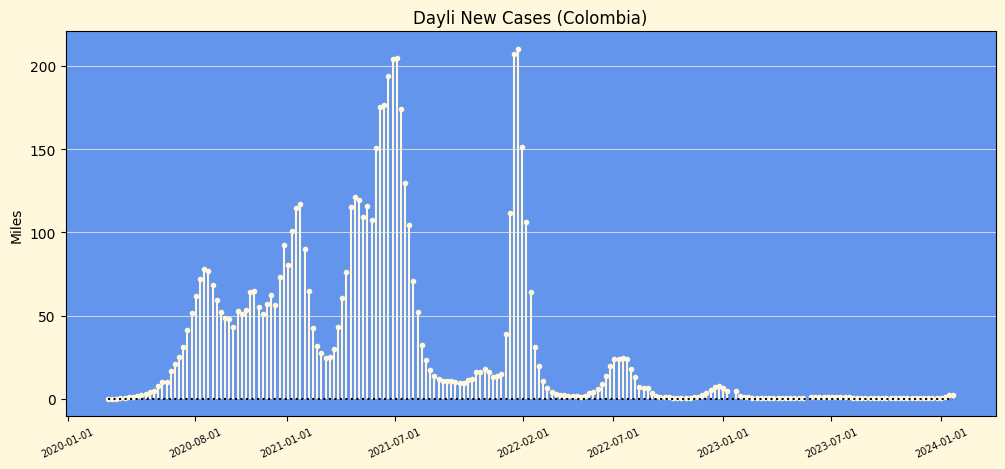

In [ ]:
#Colombia
plt.rcParams["axes.facecolor"] = "#6495ED"
fig, ax = plt.subplots(figsize=(12, 5),facecolor='#FFF8DC')
ax.stem(new_cases_col.index, new_cases_col.values/1e3,basefmt = 'k:',markerfmt= '.',linefmt ='#FFF8DC')
plt.axhline(200,color = '#FFF8DC',linewidth = 0.5)
plt.axhline(150,color = '#FFF8DC',linewidth = 0.5)
plt.axhline(100,color = '#FFF8DC',linewidth = 0.5)
plt.axhline(50,color = '#FFF8DC',linewidth = 0.5)
plt.ylabel('Miles')
plt.xticks(['2020-01','2020-08','2021-01','2021-07','2022-02','2023-01','2023-07','2024-01','2022-07'],rotation =25,fontsize=7)
plt.title('Dayli New Cases (Colombia)')

#### Casos Argentina

In [ ]:
#Daily New Cases Argentina
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.set_index('Country')
grouped_df = grouped_df.loc[['Argentina']]
fechas = grouped_df.columns
new_cases_Arg = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
new_cases_Arg = new_cases_Arg[new_cases_Arg > 0]
new_cases_Arg

Date_reported
2020-03-08      22.0
2020-03-15     109.0
2020-03-22     405.0
2020-03-29     746.0
2020-04-05     791.0
               ...  
2023-12-17     620.0
2023-12-24     609.0
2023-12-31     854.0
2024-01-07    1635.0
2024-01-14    2583.0
Length: 191, dtype: float64

Text(0.5, 1.0, 'Dayli New Cases (Argentina)')

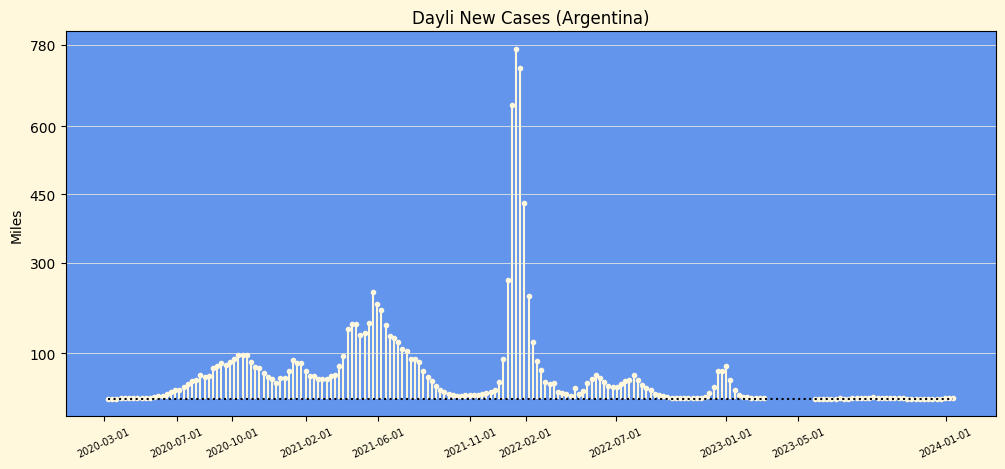

In [ ]:
#ARGENTINA
plt.rcParams["axes.facecolor"] = "#6495ED"
fig, ax = plt.subplots(figsize=(12, 5),facecolor='#FFF8DC')
ax.stem(new_cases_Arg.index, new_cases_Arg.values/1e3,basefmt = 'k:',markerfmt= '.',linefmt ='#FFF8DC')
plt.axhline(780,color = '#FFF8DC',linewidth = 0.5)
plt.axhline(600,color = '#FFF8DC',linewidth = 0.5)
plt.axhline(450,color = '#FFF8DC',linewidth = 0.5)
plt.axhline(300,color = '#FFF8DC',linewidth = 0.5)
plt.axhline(100,color = '#FFF8DC',linewidth = 0.5)
plt.ylabel('Miles')
plt.xticks(['2020-03','2024-01','2022-07','2022-02','2021-06','2020-10','2021-11','2021-02','2020-07','2023-01','2023-05'],rotation =25,fontsize=7)
plt.yticks([780,600,450,300,100])
plt.title('Dayli New Cases (Argentina)')


# Pregunta 3

In [ ]:
#Lethality Rate by Country
def get_max_row(group, column):
    return group.loc[group[column].idxmax()]

result = df_covid_limpio.groupby(['Country', df_covid_limpio['Date_reported'].dt.to_period("M")]).apply(lambda group: get_max_row(group, 'lethality_rate'))
result.reset_index(drop=True, inplace=True)
top_4_paises = result.groupby('Country')['lethality_rate'].mean().nlargest(4).index
result = result[result['Country'].isin(top_4_paises)]
#Colombia
result_pais_Col = df_covid_limpio[df_covid_limpio['Country'] == 'Colombia'].groupby(df_covid_limpio['Date_reported'].dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
result_pais_Col.reset_index(drop=True, inplace=True)
#Argentina
result_pais_Arg = df_covid_limpio[df_covid_limpio['Country'] == 'Argentina'].groupby(df_covid_limpio['Date_reported'].dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
result_pais_Arg.reset_index(drop=True, inplace=True)
#Final
result_final = pd.concat([result, result_pais_Col,result_pais_Arg])
result_final

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
6543,2020-01-05,MX,Mexico,0,0,0,0,0.000000
6544,2020-02-02,MX,Mexico,0,0,0,0,0.000000
6545,2020-03-29,MX,Mexico,1214,2117,24,28,1.322626
6546,2020-04-26,MX,Mexico,9264,22764,1453,2758,12.115621
6547,2020-09-13,MX,Mexico,35339,728985,3208,89266,12.245245
...,...,...,...,...,...,...,...,...
44,2023-09-03,AR,Argentina,3104,10059917,15,130571,1.297933
45,2023-10-01,AR,Argentina,1317,10067998,9,130634,1.297517
46,2023-11-19,AR,Argentina,532,10073197,7,130678,1.297284
47,2023-12-03,AR,Argentina,608,10074309,1,130682,1.297181


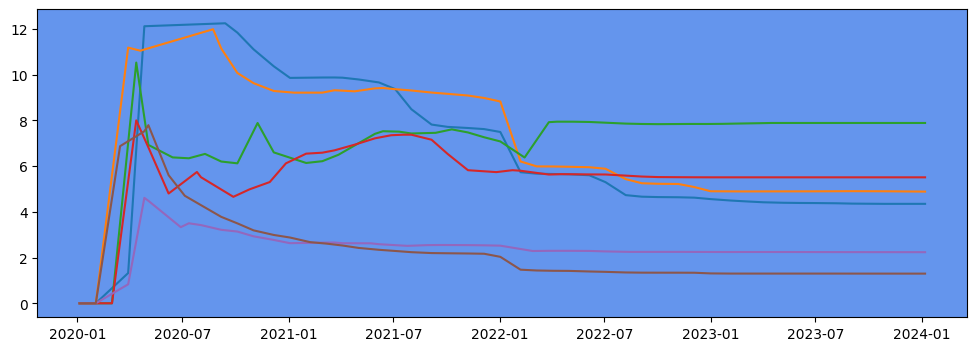

In [ ]:
# Crea el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 4))
for pais in result_final['Country'].unique():
    country_data = result_final[result_final['Country'] == pais]
    ax.plot(country_data['Date_reported'], country_data['lethality_rate'])

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe otro insight que puedas proporcionar?